# Classification with Neural Network

#### This notebook implements a neural network from scratch to classify hadnwritten digits from the MNIST database.

## Importing Libraries

In [34]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r
import random
import matplotlib.pyplot as plt 
import math

## Loading and Preprocessing 

### Loading Data 

In [35]:
digits = load_digits()

X = digits.data
y = digits.target

### Visualizing Data 

The shape of the digits dataset:
(1797, 64)


<Figure size 432x288 with 0 Axes>

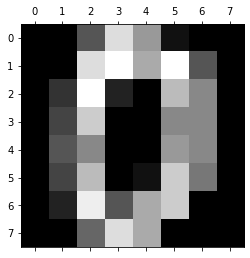

[0]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [36]:
print("The shape of the digits dataset:") 
print(X.shape)


plt.gray()

plt.matshow(digits.images[0])

plt.show()

print(y[0:1])
print(X[0,:])

### Scaling Data 

Using minMaxScaler to scale data set from -1 to 1 for the tanh activation function and from 0 to 1 for the sigmoid and ReLu functions

In [3]:
scalerTan = MinMaxScaler(feature_range=(0, 1))

scalerTan = scalerTan.fit(X)

X = scalerTan.transform(X)

### Creating training and testing sets

Splitting data set into training and testing sets with 60% of the data used for training and 40% used for testing.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
    
y_train = y_train.reshape((len(y_train)),1)
y_test = y_test.reshape((len(y_test)),1)

### Setting up the output layer 

convert_y_to_vect( ) is a function that takes the labels of the data set and converts them to vectors using one-hot encoding

In [5]:
def convert_y_to_vect(y):
    target = np.zeros((10,1))
    target[y] = 1.0
    return target

Reshaping training and testing data

In [6]:
X_train = [np.reshape(x, (64, 1)) for x in X_train]

Y_train = []

for y in y_train:
    Y_train.append(convert_y_to_vect(y))
    
trainingSet = zip(X_train, Y_train)
   
X_test = [np.reshape(x, (64, 1)) for x in X_test]

testSet = zip(X_test, y_test)

trainingSet = list(trainingSet)
testSet = list(testSet)

## Activation Functions
f(z) implements the sigmoid, tanh, and ReLu activation functions (un-comment the desired function).

In [7]:
def f(z):
    ## SIGMOID
    #return 1.0/(1.0+np.exp(-z))
    
    ## TANH
    #return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    ## ReLu  
    r = np.empty((len(z),1))
    
    for i in range(len(z)):
        r[i] = np.maximum(0,z[i])
    return r

f_deriv(z) implements the derivative of each of the activation functions (sigmoid, tanh, and ReLu)

In [8]:
def f_deriv(z):
    ## SIGMOID
    #return f(z)*(1-f(z))

    ## TANH
    #return 1 - np.power(f(z), 2)
    
    ##ReLu
    r = np.empty((len(z),1))
    
    for i in range(len(z)):
        if z[i]<=0:
            r[i] = 0
        else:
            r[i] = 1
    return r

## Creating the Neural Network

### Initializing Weights and Bias

setup_and_init_weights( ) is a function that takes the structure of the neural network as input and initializes the weights and biases from a random normal distriburion.

In [9]:
def setup_and_init_weights(nn_structure):
    
    weights = []
    bias = []
    
    for l in range(len(nn_structure)-1):
        weights.append(np.random.standard_normal(size = (nn_structure[l+1],nn_structure[l])))
        bias.append(np.random.standard_normal(size = (nn_structure[l+1],1)))

    return weights, bias

### Initializing $\triangledown W$ and $\triangledown b$

init_tri_values( ) takes the initialized weights and biases as inputs and initializes $\triangledown W$ and $\triangledown b$ to arrays of 0's with the same size as the weights and biases

In [10]:
def init_tri_values(weights, bias):
    
    dlt_W = []
    dlt_b = []
    
    for weight in weights:
        wD = np.zeros(weight.shape)
        dlt_W.append(wD)
        
    for b in bias:
        bD = np.zeros(b.shape)
        dlt_b.append(bD)
        
    return dlt_W, dlt_b       

### Feed Forward 

feed_forward( ) takes the weights, biases, and an instancve of the data set (X) and performs a forward pass through the network returning the activations and z-vectors.

In [11]:
def feed_forward(weights, bias, X):
    
    a1 = X
    a = [X]
    
    z = []
     
    for i in range(len(weights)):
        z.append(np.dot(weights[i],a1) + bias[i])
        a1 = f(z[i])
        a.append(a1)
    
    return a, z

### Back Propagation

In [12]:
def backPropagation(weights, bias, X, y, nn_structure):
    
    # initializing weight and biases
    dlt_W, dlt_b = init_tri_values(weights, bias)
    
    # performing a forward pass
    a, z_vectors = feed_forward(weights, bias, X) 
        
    # performing a backward pass through the network using negative indices to iterate backwards
    for nl in range(1,len(nn_structure)):  
        
        # calculating values for output layer
        if nl == 1:
            deriv = (a[-1] - y) * f_deriv(z_vectors[-1])
            dlt_b[-1] = deriv
            dlt_W[-1] = np.dot(deriv, a[-2].transpose())
        
        # calculating values for other layers
        else:
            z = z_vectors[-nl]
            deriv = np.dot(weights[-nl+1].transpose(), deriv) * f_deriv(z)
            dlt_b[-nl] = deriv
            dlt_W[-nl] = np.dot(deriv, a[-nl-1].transpose())
        
    return dlt_b, dlt_W  

## Training and Evaluating Neural Network

train_nn( ) takes the data set and initialized weights/ biases along with the neural network structure and performs stochastic gradient descent to train the neural network. It also takes the number of epochs, the batch size, and the learning rate to be used for the gradient descent.

In [13]:
def train_nn(trainingSet, testSet, weights, bias, nn_structure, nBatches, batch_size, learning_rate):
    
    # storing number of data points
    nData = len(trainingSet)
    
    # gradient descent 
    for i in range(nBatches):
        
        # shuffling the data set to pick batch
        random.shuffle(trainingSet)
        batches = []
        
        # getting a batches of size batch_size from the data set
        for n in range(0,nData,batch_size):
            batches.append(trainingSet[n:n+batch_size])
        
        # iterating through the batches
        for batch in batches:
            
            # initializing dlt_W and dlt_b
            dlt_W,dlt_b = init_tri_values(weights,bias)
            
            # performing back propagation and updating dlt_W and dlt_b accordingly 
            for X,y in batch:
                b, w = backPropagation(weights, bias, X,y, nn_structure)
                for i in range(len(dlt_W)):
                    dlt_W[i] = dlt_W[i]+w[i]
                for i in range(len(dlt_b)):
                    dlt_b[i] = dlt_b[i]+b[i]
            
            # updating weights using dlt_W and the learning rate
            for i in range(len(weights)):
                weights[i] = weights[i]-learning_rate*dlt_W[i]

            # updating biases using dlt_b and the learning rate
            for i in range(len(bias)):
                bias[i] = bias[i]-learning_rate*dlt_b[i]
        
        # making predictions and reporting accuracy result
        nCorrect = predict(testSet,weights,bias)
        print("Accuracy: ", nCorrect, "/", len(testSet))

## Making Predictions

The function predict( ) takes the test set and the trained weights and biases as inputs. It performs a forward pass through the network using the weights and biases and compares the predicted result to the test label. It then returns the number of correct predictions.

In [14]:
def predict(testSet,weights,bias):
    
    # initializing number of correct predictions to 0
    correct = 0
    
    # for each data point in the test set, predicts a label then compares it to test label
    for x, y in testSet:
        
        # making prediction (forward pass)
        for i in range(len(weights)):
            x = f(np.dot(weights[i],x)+bias[i])
        
        # maximum value of output of forward pass is the prediction
        result = np.argmax(x)
        
        # comparing prediction to test label
        if result == y:
            correct+=1
    
    # returning the number of correct predictions
    return correct

## Training Network and Displaying Results 

### Sigmoid Function

With a structure of  [64, 30, 10], the best accuracy for the neural network was 703/719 (97.77%) with a learning rate of 0.4. Changing the parameters to  [64, 10 , 10] yielded slightly lower accuracy with 682/719 (94.85%) at its peak (the learning rate was adjusted for experimentation and resulted in better accuracy with a lower learning rate (0.1)). Changing the parameters to  [64, 50, 10] resulted in a similar accuracy to the first one (702/719 or 97.64%). Increasing the second layer to 100 resulted in a significantly lower accuracy of 420/719 (58.41%). 

In [21]:
weights, bias = setup_and_init_weights([64,30,10])

In [22]:
train_nn(trainingSet, testSet, weights, bias,[64,30,10],50, 10, 0.4)

Accuracy:  493 / 719
Accuracy:  587 / 719
Accuracy:  659 / 719
Accuracy:  661 / 719
Accuracy:  674 / 719
Accuracy:  686 / 719
Accuracy:  683 / 719
Accuracy:  692 / 719
Accuracy:  687 / 719
Accuracy:  688 / 719
Accuracy:  691 / 719
Accuracy:  694 / 719
Accuracy:  695 / 719
Accuracy:  689 / 719
Accuracy:  695 / 719
Accuracy:  693 / 719
Accuracy:  699 / 719
Accuracy:  696 / 719
Accuracy:  699 / 719
Accuracy:  696 / 719
Accuracy:  696 / 719
Accuracy:  695 / 719
Accuracy:  699 / 719
Accuracy:  701 / 719
Accuracy:  699 / 719
Accuracy:  700 / 719
Accuracy:  699 / 719
Accuracy:  696 / 719
Accuracy:  702 / 719
Accuracy:  701 / 719
Accuracy:  701 / 719
Accuracy:  701 / 719
Accuracy:  703 / 719
Accuracy:  700 / 719
Accuracy:  701 / 719
Accuracy:  701 / 719
Accuracy:  702 / 719
Accuracy:  701 / 719
Accuracy:  703 / 719
Accuracy:  703 / 719
Accuracy:  702 / 719
Accuracy:  701 / 719
Accuracy:  701 / 719
Accuracy:  701 / 719
Accuracy:  699 / 719
Accuracy:  701 / 719
Accuracy:  701 / 719
Accuracy:  70

In [17]:
weights, bias = setup_and_init_weights([64,10,10])

In [18]:
train_nn(trainingSet, testSet, weights, bias,[64,10,10],50, 10, 0.1)

Accuracy:  224 / 719
Accuracy:  304 / 719
Accuracy:  378 / 719
Accuracy:  446 / 719
Accuracy:  469 / 719
Accuracy:  510 / 719
Accuracy:  521 / 719
Accuracy:  531 / 719
Accuracy:  556 / 719
Accuracy:  570 / 719
Accuracy:  603 / 719
Accuracy:  602 / 719
Accuracy:  627 / 719
Accuracy:  644 / 719
Accuracy:  640 / 719
Accuracy:  645 / 719
Accuracy:  653 / 719
Accuracy:  653 / 719
Accuracy:  657 / 719
Accuracy:  653 / 719
Accuracy:  661 / 719
Accuracy:  660 / 719
Accuracy:  670 / 719
Accuracy:  663 / 719
Accuracy:  666 / 719
Accuracy:  674 / 719
Accuracy:  666 / 719
Accuracy:  673 / 719
Accuracy:  673 / 719
Accuracy:  668 / 719
Accuracy:  675 / 719
Accuracy:  673 / 719
Accuracy:  674 / 719
Accuracy:  677 / 719
Accuracy:  674 / 719
Accuracy:  680 / 719
Accuracy:  681 / 719
Accuracy:  680 / 719
Accuracy:  679 / 719
Accuracy:  679 / 719
Accuracy:  679 / 719
Accuracy:  681 / 719
Accuracy:  681 / 719
Accuracy:  680 / 719
Accuracy:  679 / 719
Accuracy:  682 / 719
Accuracy:  680 / 719
Accuracy:  67

In [19]:
weights, bias = setup_and_init_weights([64,50,10])

In [20]:
train_nn(trainingSet, testSet, weights, bias,[64,50,10],50, 10, 0.5)

Accuracy:  347 / 719
Accuracy:  557 / 719
Accuracy:  618 / 719
Accuracy:  655 / 719
Accuracy:  683 / 719
Accuracy:  682 / 719
Accuracy:  688 / 719
Accuracy:  691 / 719
Accuracy:  695 / 719
Accuracy:  685 / 719
Accuracy:  691 / 719
Accuracy:  694 / 719
Accuracy:  697 / 719
Accuracy:  694 / 719
Accuracy:  696 / 719
Accuracy:  692 / 719
Accuracy:  697 / 719
Accuracy:  699 / 719
Accuracy:  695 / 719
Accuracy:  699 / 719
Accuracy:  700 / 719
Accuracy:  698 / 719
Accuracy:  696 / 719
Accuracy:  698 / 719
Accuracy:  698 / 719
Accuracy:  699 / 719
Accuracy:  698 / 719
Accuracy:  697 / 719
Accuracy:  697 / 719
Accuracy:  700 / 719
Accuracy:  700 / 719
Accuracy:  697 / 719
Accuracy:  699 / 719
Accuracy:  698 / 719
Accuracy:  699 / 719
Accuracy:  697 / 719
Accuracy:  699 / 719
Accuracy:  696 / 719
Accuracy:  699 / 719
Accuracy:  698 / 719
Accuracy:  697 / 719
Accuracy:  698 / 719
Accuracy:  699 / 719
Accuracy:  698 / 719
Accuracy:  699 / 719
Accuracy:  702 / 719
Accuracy:  699 / 719
Accuracy:  70

In [31]:
weights, bias = setup_and_init_weights([64,100,10])

In [32]:
train_nn(trainingSet, testSet, weights, bias,[64,100,10],50, 10, 0.3)

Accuracy:  137 / 719
Accuracy:  224 / 719
Accuracy:  290 / 719
Accuracy:  336 / 719
Accuracy:  354 / 719
Accuracy:  360 / 719
Accuracy:  362 / 719
Accuracy:  371 / 719
Accuracy:  406 / 719
Accuracy:  414 / 719
Accuracy:  416 / 719
Accuracy:  413 / 719
Accuracy:  415 / 719
Accuracy:  415 / 719
Accuracy:  415 / 719
Accuracy:  416 / 719
Accuracy:  411 / 719
Accuracy:  413 / 719
Accuracy:  409 / 719
Accuracy:  412 / 719
Accuracy:  413 / 719
Accuracy:  416 / 719
Accuracy:  414 / 719
Accuracy:  414 / 719
Accuracy:  414 / 719
Accuracy:  412 / 719
Accuracy:  416 / 719
Accuracy:  416 / 719
Accuracy:  413 / 719
Accuracy:  416 / 719
Accuracy:  414 / 719
Accuracy:  414 / 719
Accuracy:  416 / 719
Accuracy:  416 / 719
Accuracy:  415 / 719
Accuracy:  415 / 719
Accuracy:  416 / 719
Accuracy:  414 / 719
Accuracy:  415 / 719
Accuracy:  414 / 719
Accuracy:  415 / 719
Accuracy:  415 / 719
Accuracy:  416 / 719
Accuracy:  416 / 719
Accuracy:  415 / 719
Accuracy:  416 / 719
Accuracy:  418 / 719
Accuracy:  41

### TanH Function

With a structure of [64,30,10] the TanH activation function performed best with a learning rate of 0.05 and got an accuracy of 608/719 (84.56%). With [64,50,10] it performed slightly worse with an accuracy of 583/719 (81.08%). With [64,10,10], it performed worse with 476/719 (66.2%), which also required a higher learning rate of 0.8.

In [29]:
weights, bias = setup_and_init_weights([64,30,10])
train_nn(trainingSet, testSet, weights, bias,[64,30,10],50, 10, 0.05)

Accuracy:  137 / 719
Accuracy:  200 / 719
Accuracy:  121 / 719
Accuracy:  297 / 719
Accuracy:  252 / 719
Accuracy:  323 / 719
Accuracy:  203 / 719
Accuracy:  449 / 719
Accuracy:  345 / 719
Accuracy:  400 / 719
Accuracy:  208 / 719
Accuracy:  518 / 719
Accuracy:  414 / 719
Accuracy:  459 / 719
Accuracy:  297 / 719
Accuracy:  560 / 719
Accuracy:  442 / 719
Accuracy:  423 / 719
Accuracy:  482 / 719
Accuracy:  427 / 719
Accuracy:  331 / 719
Accuracy:  425 / 719
Accuracy:  435 / 719
Accuracy:  396 / 719
Accuracy:  423 / 719
Accuracy:  145 / 719
Accuracy:  440 / 719
Accuracy:  545 / 719
Accuracy:  518 / 719
Accuracy:  448 / 719
Accuracy:  268 / 719
Accuracy:  345 / 719
Accuracy:  327 / 719
Accuracy:  507 / 719
Accuracy:  435 / 719
Accuracy:  332 / 719
Accuracy:  379 / 719
Accuracy:  517 / 719
Accuracy:  480 / 719
Accuracy:  421 / 719
Accuracy:  408 / 719
Accuracy:  434 / 719
Accuracy:  510 / 719
Accuracy:  373 / 719
Accuracy:  559 / 719
Accuracy:  551 / 719
Accuracy:  577 / 719
Accuracy:  52

In [30]:
weights, bias = setup_and_init_weights([64,50,10])
train_nn(trainingSet, testSet, weights, bias,[64,50,10],50, 10, 0.05)

Accuracy:  145 / 719
Accuracy:  319 / 719
Accuracy:  322 / 719
Accuracy:  319 / 719
Accuracy:  106 / 719
Accuracy:  232 / 719
Accuracy:  163 / 719
Accuracy:  160 / 719
Accuracy:  233 / 719
Accuracy:  230 / 719
Accuracy:  197 / 719
Accuracy:  374 / 719
Accuracy:  199 / 719
Accuracy:  391 / 719
Accuracy:  223 / 719
Accuracy:  292 / 719
Accuracy:  470 / 719
Accuracy:  417 / 719
Accuracy:  411 / 719
Accuracy:  417 / 719
Accuracy:  382 / 719
Accuracy:  577 / 719
Accuracy:  456 / 719
Accuracy:  514 / 719
Accuracy:  494 / 719
Accuracy:  388 / 719
Accuracy:  416 / 719
Accuracy:  391 / 719
Accuracy:  231 / 719
Accuracy:  427 / 719
Accuracy:  474 / 719
Accuracy:  201 / 719
Accuracy:  258 / 719
Accuracy:  454 / 719
Accuracy:  419 / 719
Accuracy:  215 / 719
Accuracy:  224 / 719
Accuracy:  497 / 719
Accuracy:  230 / 719
Accuracy:  408 / 719
Accuracy:  270 / 719
Accuracy:  555 / 719
Accuracy:  171 / 719
Accuracy:  415 / 719
Accuracy:  487 / 719
Accuracy:  257 / 719
Accuracy:  583 / 719
Accuracy:  56

In [35]:
weights, bias = setup_and_init_weights([64,10,10])
train_nn(trainingSet, testSet, weights, bias,[64,10,10],50, 10, 0.08)

Accuracy:  213 / 719
Accuracy:  92 / 719
Accuracy:  180 / 719
Accuracy:  223 / 719
Accuracy:  294 / 719
Accuracy:  161 / 719
Accuracy:  349 / 719
Accuracy:  257 / 719
Accuracy:  183 / 719
Accuracy:  335 / 719
Accuracy:  419 / 719
Accuracy:  234 / 719
Accuracy:  328 / 719
Accuracy:  205 / 719
Accuracy:  280 / 719
Accuracy:  322 / 719
Accuracy:  293 / 719
Accuracy:  428 / 719
Accuracy:  342 / 719
Accuracy:  340 / 719
Accuracy:  123 / 719
Accuracy:  316 / 719
Accuracy:  276 / 719
Accuracy:  311 / 719
Accuracy:  389 / 719
Accuracy:  273 / 719
Accuracy:  202 / 719
Accuracy:  389 / 719
Accuracy:  374 / 719
Accuracy:  263 / 719
Accuracy:  411 / 719
Accuracy:  521 / 719
Accuracy:  295 / 719
Accuracy:  314 / 719
Accuracy:  288 / 719
Accuracy:  476 / 719
Accuracy:  449 / 719
Accuracy:  192 / 719
Accuracy:  411 / 719
Accuracy:  428 / 719
Accuracy:  278 / 719
Accuracy:  369 / 719
Accuracy:  300 / 719
Accuracy:  265 / 719
Accuracy:  247 / 719
Accuracy:  377 / 719
Accuracy:  364 / 719
Accuracy:  380

### ReLu Function

The ReLu function did not perform very well for this task. For a structure of [64,30,10] it had an accuracy of 82/719 (11.4%). With [64,50,10], and a learning rate of 0.00001, it got an accuracy of 76/719 (10.57%). With [64,10,10] it performed better with 163/719 (22.67%) also with a learning rate of 0.00001. Smaller learning rates seemed to work better with the ReLu function.

In [33]:
weights, bias = setup_and_init_weights([64,30,10])
train_nn(trainingSet, testSet, weights, bias,[64,30,10],50, 30, 0.00001)

Accuracy:  44 / 719
Accuracy:  70 / 719
Accuracy:  73 / 719
Accuracy:  77 / 719
Accuracy:  78 / 719
Accuracy:  76 / 719
Accuracy:  82 / 719
Accuracy:  81 / 719
Accuracy:  80 / 719
Accuracy:  80 / 719
Accuracy:  79 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  78 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  77 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  75 / 719
Accuracy:  75 / 719


In [26]:
weights, bias = setup_and_init_weights([64,50,10])
train_nn(trainingSet, testSet, weights, bias,[64,50,10],50, 5, 0.00001)

Accuracy:  53 / 719
Accuracy:  61 / 719
Accuracy:  70 / 719
Accuracy:  76 / 719
Accuracy:  76 / 719
Accuracy:  74 / 719
Accuracy:  70 / 719
Accuracy:  71 / 719
Accuracy:  72 / 719
Accuracy:  74 / 719
Accuracy:  73 / 719
Accuracy:  75 / 719
Accuracy:  74 / 719
Accuracy:  74 / 719
Accuracy:  75 / 719
Accuracy:  74 / 719
Accuracy:  74 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  72 / 719
Accuracy:  73 / 719
Accuracy:  73 / 719


In [27]:
weights, bias = setup_and_init_weights([64,10,10])
train_nn(trainingSet, testSet, weights, bias,[64,10,10],50, 30, 0.00001)

Accuracy:  105 / 719
Accuracy:  106 / 719
Accuracy:  102 / 719
Accuracy:  106 / 719
Accuracy:  111 / 719
Accuracy:  120 / 719
Accuracy:  124 / 719
Accuracy:  130 / 719
Accuracy:  140 / 719
Accuracy:  146 / 719
Accuracy:  146 / 719
Accuracy:  149 / 719
Accuracy:  151 / 719
Accuracy:  155 / 719
Accuracy:  158 / 719
Accuracy:  154 / 719
Accuracy:  156 / 719
Accuracy:  155 / 719
Accuracy:  159 / 719
Accuracy:  160 / 719
Accuracy:  163 / 719
Accuracy:  163 / 719
Accuracy:  162 / 719
Accuracy:  162 / 719
Accuracy:  162 / 719
Accuracy:  161 / 719
Accuracy:  159 / 719
Accuracy:  159 / 719
Accuracy:  157 / 719
Accuracy:  156 / 719
Accuracy:  155 / 719
Accuracy:  155 / 719
Accuracy:  154 / 719
Accuracy:  153 / 719
Accuracy:  152 / 719
Accuracy:  151 / 719
Accuracy:  149 / 719
Accuracy:  152 / 719
Accuracy:  151 / 719
Accuracy:  149 / 719
Accuracy:  149 / 719
Accuracy:  148 / 719
Accuracy:  147 / 719
Accuracy:  146 / 719
Accuracy:  146 / 719
Accuracy:  145 / 719
Accuracy:  145 / 719
Accuracy:  14